In [4]:
import  pandas as pd

In [5]:
df=pd.read_csv('social.csv')

In [6]:
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [7]:
ft=df.iloc[:,2:4].values
ft.shape

(400, 2)

In [8]:
label=df.iloc[:,-1].values
label.shape

(400,)

## features scalling for maintaing age and salary in same mathematical range

In [9]:
from  sklearn.model_selection import train_test_split
x1,x2,y1,y2=train_test_split(ft,label)

In [10]:
# feature scalling
from  sklearn.preprocessing  import StandardScaler
std=StandardScaler()

In [11]:
x_train=std.fit_transform(x1)
#  transforming  age and salary that is features

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
# transforming  testing data
x_test=std.transform(x2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
from sklearn.neighbors  import  KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=5)

In [15]:
out=clf.fit(x_train,y1)  # training  transform data

In [16]:
result=out.predict(x_test)  #  predicting  the data from  transformed testing data

In [17]:
#  accuracy score 
from sklearn.metrics  import accuracy_score
accuracy_score(y2,result)

0.91

In [21]:
# plotting  general graphs 
import matplotlib.pyplot  as plt
plt.bar(df.iloc[:,1],df.iloc[:,2])

<BarContainer object of 400 artists>

In [22]:
#  plotting  prediction  graphs
from matplotlib.colors  import ListedColormap
import  numpy  as np

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


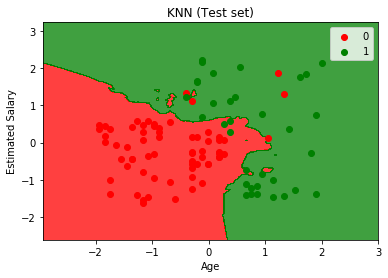

In [24]:
# visualizing training and set results
X_set, y_set = x_test, y2
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()